# Kelompok 5

FIKRY IDHAM DWIYANA (2101294)

TALITHA FAYARINA ADHIGUNAWAN (2201271)

RATU SYAHIRAH KHAIRUNNISA (2200978)

WILDAN HAFIZH RAFFIANSHAR (2202301)

ADRIAN MULIANTO (2200939)

## Praproses Data

1. Memperbaiki nama atribut di tiap dataframe
- mengubah nama atribut menjadi lowercase
- mengubah " " dan "." menjadi "_"

2. Melakukan drop pada atribut
- atribut provinsi dengan data 0 semua di drop karena datanya hanya berisi 0

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Load Dataset

In [2]:
# Baca data dari 5 file Excel
file_paths = ['Data Bencana Banjir.xlsx', 'Data Bencana Kebakaran.xlsx', 'Data Bencana Kekeringan.xlsx', 'Data Bencana Longsor.xlsx', 'Data Bencana Puting Beliung.xlsx',\
                'Data Bencana Abrasi.xlsx', 'Data Bencana Gempa Bumi.xlsx', 'Data Bencana Tsunami.xlsx', 'Data Bencana Gunung Meletus.xlsx', 'Data Bencana Gempa dan Tsunami.xlsx']
dfs = [pd.read_excel(file, header=1) for file in file_paths]

Menambahkan Kolom Bencana untuk Mengidentifikasi Jenis Bencana

In [3]:
# Tambahkan kolom 'Bencana' ke masing-masing DataFrame untuk mengidentifikasi jenis bencana
for i, df in enumerate(dfs):
    df['Bencana'] = file_paths[i].replace('Data Bencana ', '').replace('.xlsx', '')

Menyatukan Data Set menjadi Data Frame

In [4]:
# Gabungkan data menjadi satu DataFrame
combined_data = pd.concat(dfs)
# combined_data.info()
combined_data

,Unnamed: 0,Laki-laki,Perempuan,Jumlah (L+P),Unnamed: 4,Meninggal,Hilang,Terluka,Menderita,Mengungsi,...,Rumah,Fasilitas Pendidikan,Fasilitas Kesehatan,Fasilitas Peribadatan,Fasilitas Umum,Perkantoran,Jembatan,Pabrik,Kios,Bencana
0,11. Aceh,773,163,104,608,1530386,999341,2530602,53634,725,...,288,0,78,447,0,84,NaN,NaN,NaN,Banjir
1,12. Sumatera Utara,688,365,177,12668,1041982,277730,1332922,26790,987,...,102,9,15,104,1,77,NaN,NaN,NaN,Banjir
2,13. Sumatera Barat,489,129,24,133,197549,141489,339324,12965,169,...,130,0,20,299,0,489,NaN,NaN,NaN,Banjir
3,14. Riau,221,54,1,5789,739558,145498,890900,30584,829,...,547,0,7,144,0,0,NaN,NaN,NaN,Banjir
4,15. Jambi,292,31,12,881,439958,92387,533269,12081,541,...,110,0,29,40,0,1,NaN,NaN,NaN,Banjir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11. Aceh,21,128728,37063,2830,0,518450,687071,179312,1226,...,2742,0,1638,1257,0,0,NaN,NaN,NaN,Gempa dan Tsunami
1,12. Sumatera Utara,1,130,24,1832,0,4012,5998,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Gempa dan Tsunami
2,18. Lampung,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Gempa dan Tsunami
3,72. Sulawesi Tengah,4,3673,667,4438,0,172635,181413,99726,1299,...,327,0,78,7,0,362,NaN,NaN,NaN,Gempa dan Tsunami


In [5]:
# menggati nama menjadi lower case dan nama data yang memiliki spasi di ganti menajdi _ (under score)
combined_data= combined_data.rename(columns=str.lower)
combined_data.columns = combined_data.columns.str.replace(' ', '_')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed:_0             256 non-null    object 
 1   laki-laki              256 non-null    int64  
 2   perempuan              256 non-null    int64  
 3   jumlah_(l+p)           256 non-null    int64  
 4   unnamed:_4             256 non-null    int64  
 5   meninggal              256 non-null    int64  
 6   hilang                 256 non-null    int64  
 7   terluka                256 non-null    int64  
 8   menderita              256 non-null    int64  
 9   mengungsi              256 non-null    int64  
 10  jumlah                 256 non-null    int64  
 11  rumah                  256 non-null    int64  
 12  fasilitas_pendidikan   256 non-null    int64  
 13  fasilitas_kesehatan    256 non-null    int64  
 14  fasilitas_peribadatan  256 non-null    int64  
 15  fasilitas_umu

In [6]:
# mengganti nama provinsi dan nama jumlah bencana yang tidak terbaca
combined_data.columns = combined_data.columns.str.replace('unnamed:_0', 'provinsi')
combined_data.columns = combined_data.columns.str.replace('unnamed:_4', "jumlah_bencana")
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   provinsi               256 non-null    object 
 1   laki-laki              256 non-null    int64  
 2   perempuan              256 non-null    int64  
 3   jumlah_(l+p)           256 non-null    int64  
 4   jumlah_bencana         256 non-null    int64  
 5   meninggal              256 non-null    int64  
 6   hilang                 256 non-null    int64  
 7   terluka                256 non-null    int64  
 8   menderita              256 non-null    int64  
 9   mengungsi              256 non-null    int64  
 10  jumlah                 256 non-null    int64  
 11  rumah                  256 non-null    int64  
 12  fasilitas_pendidikan   256 non-null    int64  
 13  fasilitas_kesehatan    256 non-null    int64  
 14  fasilitas_peribadatan  256 non-null    int64  
 15  fasilitas_umu

In [7]:
combined_data.isna().sum()

provinsi                   0
laki-laki                  0
perempuan                  0
jumlah_(l+p)               0
jumlah_bencana             0
meninggal                  0
hilang                     0
terluka                    0
menderita                  0
mengungsi                  0
jumlah                     0
rumah                      0
fasilitas_pendidikan       0
fasilitas_kesehatan        0
fasilitas_peribadatan      0
fasilitas_umum             0
perkantoran                0
jembatan                 256
pabrik                   256
kios                     256
bencana                    0
dtype: int64

In [8]:
combined_data = combined_data.drop(['laki-laki','perempuan', 'jumlah_(l+p)', 'jumlah', 'jembatan','pabrik', 'kios'], axis=1)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   provinsi               256 non-null    object
 1   jumlah_bencana         256 non-null    int64 
 2   meninggal              256 non-null    int64 
 3   hilang                 256 non-null    int64 
 4   terluka                256 non-null    int64 
 5   menderita              256 non-null    int64 
 6   mengungsi              256 non-null    int64 
 7   rumah                  256 non-null    int64 
 8   fasilitas_pendidikan   256 non-null    int64 
 9   fasilitas_kesehatan    256 non-null    int64 
 10  fasilitas_peribadatan  256 non-null    int64 
 11  fasilitas_umum         256 non-null    int64 
 12  perkantoran            256 non-null    int64 
 13  bencana                256 non-null    object
dtypes: int64(12), object(2)
memory usage: 30.0+ KB


In [9]:
combined_data.isna().sum()

provinsi                 0
jumlah_bencana           0
meninggal                0
hilang                   0
terluka                  0
menderita                0
mengungsi                0
rumah                    0
fasilitas_pendidikan     0
fasilitas_kesehatan      0
fasilitas_peribadatan    0
fasilitas_umum           0
perkantoran              0
bencana                  0
dtype: int64

In [10]:
# combined_data = combined_data.loc[combined_data['provinsi'] == 'Jumlah']
#combined_data.drop('Jumlah', axis="rows")
combined_data = combined_data[combined_data['provinsi'] != 'Jumlah']



In [11]:
combined_data

,provinsi,jumlah_bencana,meninggal,hilang,terluka,menderita,mengungsi,rumah,fasilitas_pendidikan,fasilitas_kesehatan,fasilitas_peribadatan,fasilitas_umum,perkantoran,bencana
0,11. Aceh,608,1530386,999341,2530602,53634,725,288,0,78,447,0,84,Banjir
1,12. Sumatera Utara,12668,1041982,277730,1332922,26790,987,102,9,15,104,1,77,Banjir
2,13. Sumatera Barat,133,197549,141489,339324,12965,169,130,0,20,299,0,489,Banjir
3,14. Riau,5789,739558,145498,890900,30584,829,547,0,7,144,0,0,Banjir
4,15. Jambi,881,439958,92387,533269,12081,541,110,0,29,40,0,1,Banjir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11. Aceh,2830,0,518450,687071,179312,1226,2742,0,1638,1257,0,0,Gempa dan Tsunami
1,12. Sumatera Utara,1832,0,4012,5998,0,0,0,0,0,0,0,0,Gempa dan Tsunami
2,18. Lampung,0,0,0,0,0,0,0,0,0,0,0,0,Gempa dan Tsunami
3,72. Sulawesi Tengah,4438,0,172635,181413,99726,1299,327,0,78,7,0,362,Gempa dan Tsunami


In [12]:
combined_data.isna().sum()

provinsi                 0
jumlah_bencana           0
meninggal                0
hilang                   0
terluka                  0
menderita                0
mengungsi                0
rumah                    0
fasilitas_pendidikan     0
fasilitas_kesehatan      0
fasilitas_peribadatan    0
fasilitas_umum           0
perkantoran              0
bencana                  0
dtype: int64

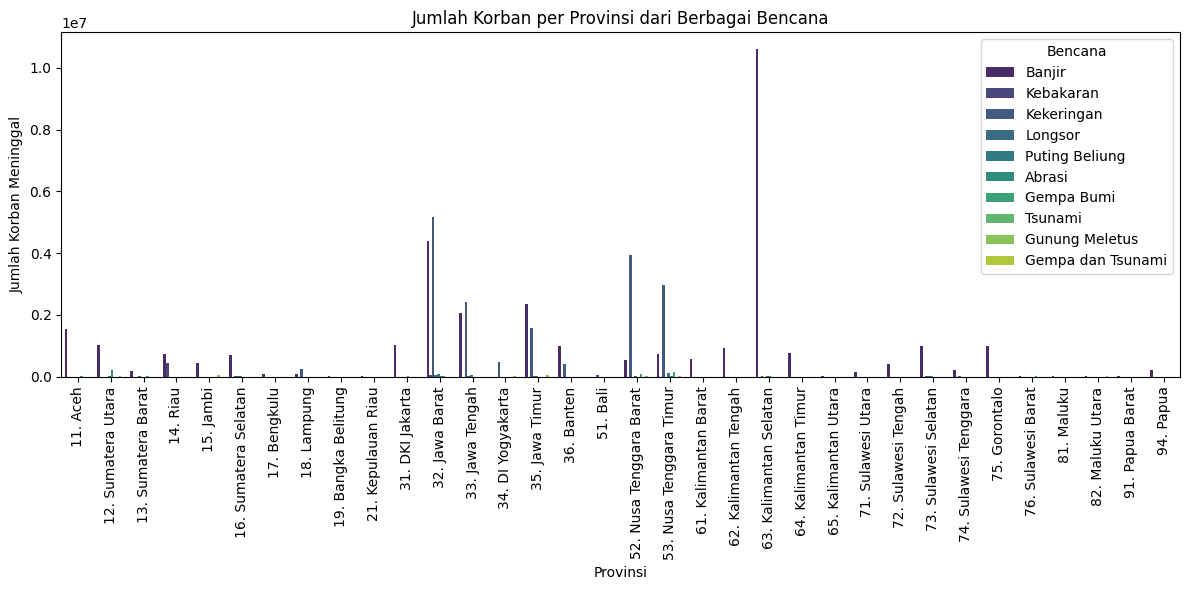

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data, x='provinsi', y='meninggal', hue='bencana', palette='viridis')
# plt.ylim (0, 100000)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Meninggal')
plt.title('Jumlah Korban per Provinsi dari Berbagai Bencana')
plt.xticks(rotation=90)
# plt.yticks(range(0, max(combined_data.meninggal), 0.01))
plt.legend(title='Bencana', loc='upper right')
plt.tight_layout()

# Menampilkan plot
plt.show()

In [14]:
test = combined_data
# test['meninggal'] = combined_data['meninggal'].where(((combined_data.meninggal < 10000)), None)
#combined_data["thn_lahir"] = combined_data["thn_lahir"].astype("Int64")
combined_data = combined_data[combined_data['provinsi'] != "63. Kalimantan Selatan"]

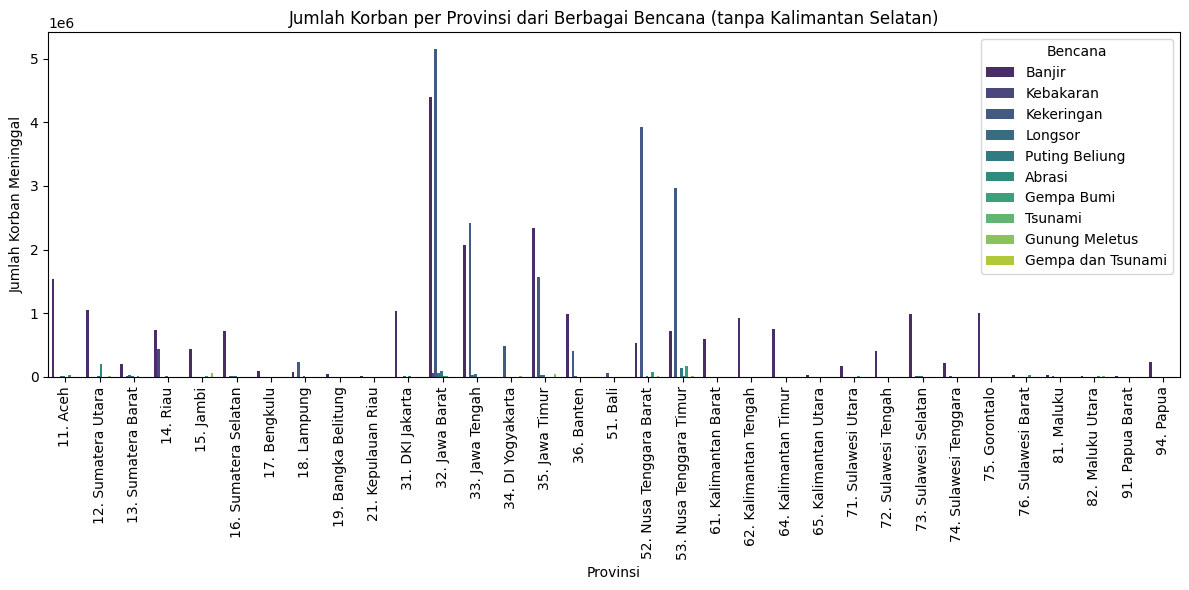

In [19]:
# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data, x='provinsi', y='meninggal', hue='bencana', palette='viridis')
# plt.ylim (0, 100000)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Meninggal')
plt.title('Jumlah Korban per Provinsi dari Berbagai Bencana (tanpa Kalimantan Selatan)')
plt.xticks(rotation=90)
# plt.yticks(range(0, max(combined_data.meninggal), 0.01))
plt.legend(title='Bencana', loc='upper right')
plt.tight_layout()

# Menampilkan plot
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 [Text(1, 0, '11. Aceh'),
  Text(2, 0, '12. Sumatera Utara'),
  Text(3, 0, '13. Sumatera Barat'),
  Text(4, 0, '14. Riau'),
  Text(5, 0, '15. Jambi'),
  Text(6, 0, '16. Sumatera Selatan'),
  Text(7, 0, '17. Bengkulu'),
  Text(8, 0, '18. Lampung'),
  Text(9, 0, '19. Bangka Belitung'),
  Text(10, 0, '21. Kepulauan Riau'),
  Text(11, 0, '31. DKI Jakarta'),
  Text(12, 0, '32. Jawa Barat'),
  Text(13, 0, '33. Jawa Tengah'),
  Text(14, 0, '34. DI Yogyakarta'),
  Text(15, 0, '35. Jawa Timur'),
  Text(16, 0, '36. Banten'),
  Text(17, 0, '51. Bali'),
  Text(18, 0, '52. Nusa Tenggara Barat'),
  Text(19, 0, '53. Nusa Tenggara Timur'),
  Text(20, 0, '61. Kalimantan Barat'),
  Text(21, 0, '62. Kalimantan Tengah'),
  Text(22, 0, '63. Kalimantan Selatan'),
  Text(23, 0, '64. Kalimantan Timur'),
  Text(24, 0, '65. Kalimantan Utara'),
  Text(25, 0, '7

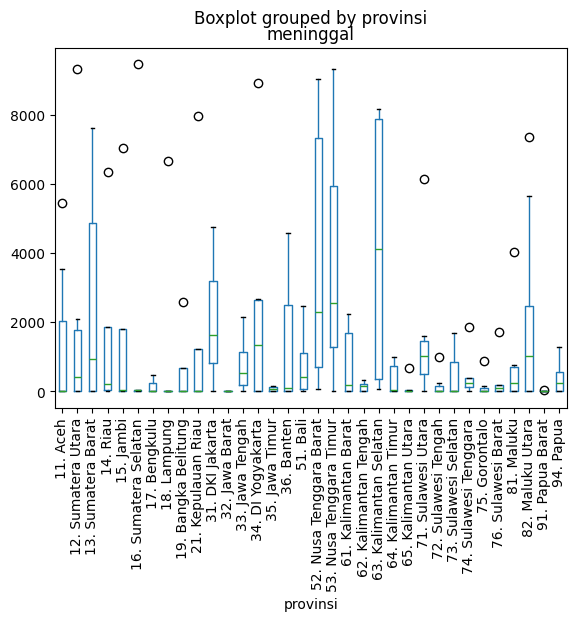

In [ ]:
test.boxplot(by = 'provinsi', column = ['meninggal'], grid = False)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '11. Aceh'),
  Text(1, 0, '12. Sumatera Utara'),
  Text(2, 0, '13. Sumatera Barat'),
  Text(3, 0, '14. Riau'),
  Text(4, 0, '15. Jambi'),
  Text(5, 0, '16. Sumatera Selatan'),
  Text(6, 0, '17. Bengkulu'),
  Text(7, 0, '18. Lampung'),
  Text(8, 0, '19. Bangka Belitung'),
  Text(9, 0, '21. Kepulauan Riau'),
  Text(10, 0, '31. DKI Jakarta'),
  Text(11, 0, '32. Jawa Barat'),
  Text(12, 0, '33. Jawa Tengah'),
  Text(13, 0, '34. DI Yogyakarta'),
  Text(14, 0, '35. Jawa Timur'),
  Text(15, 0, '36. Banten'),
  Text(16, 0, '51. Bali'),
  Text(17, 0, '52. Nusa Tenggara Barat'),
  Text(18, 0, '53. Nusa Tenggara Timur'),
  Text(19, 0, '61. Kalimantan Barat'),
  Text(20, 0, '62. Kalimantan Tengah'),
  Text(21, 0, '63. Kalimantan Selatan'),
  Text(22, 0, '64. Kalimantan Timur'),
  Text(23, 0, '

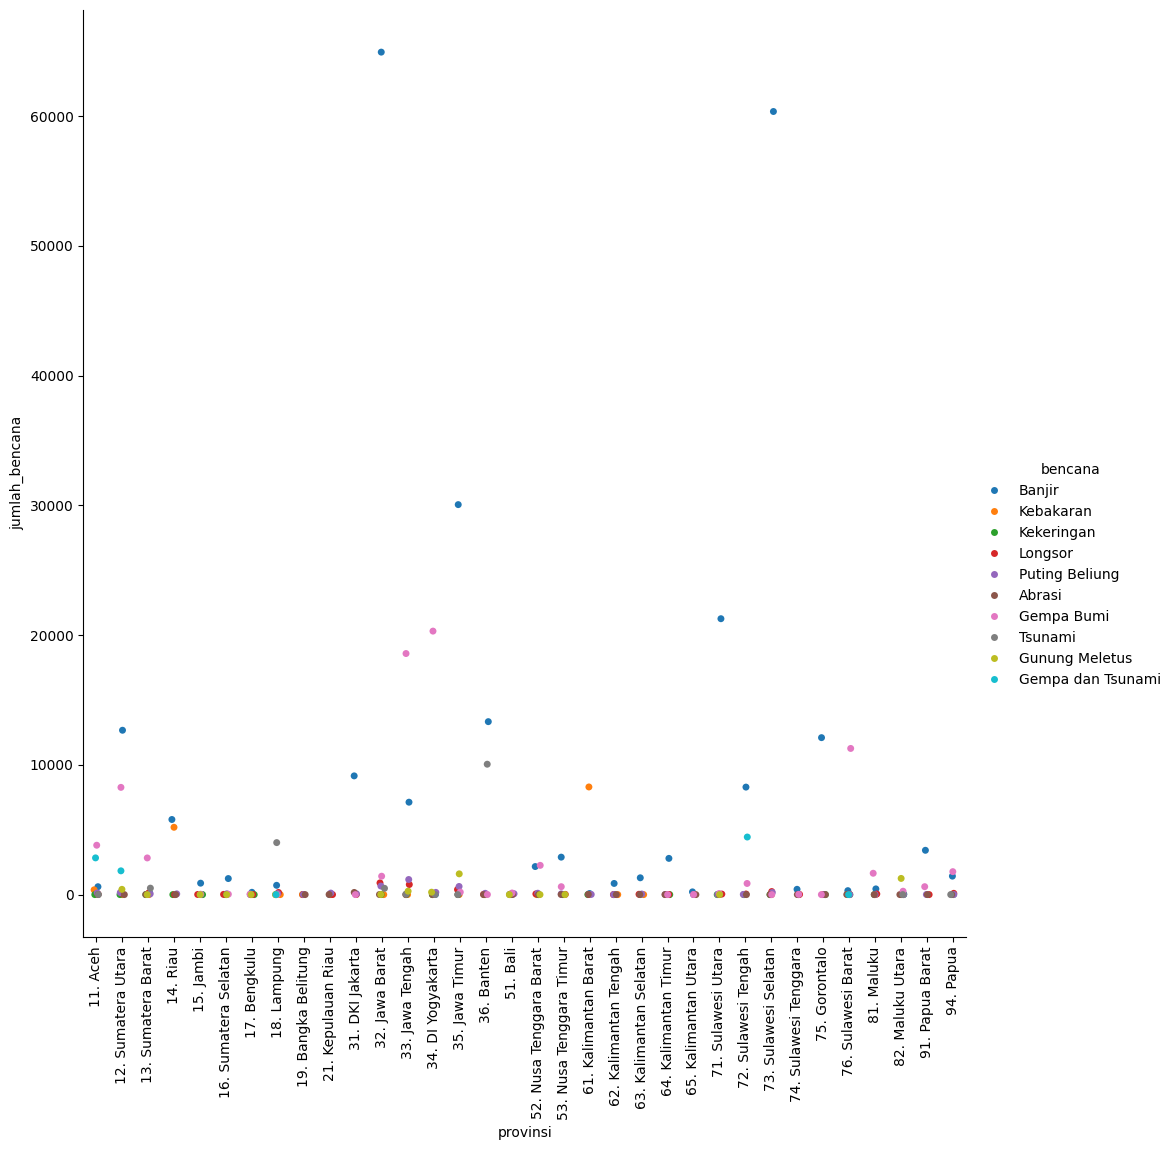

In [ ]:

sns.catplot(x="provinsi", y="jumlah_bencana", hue="bencana", data=test, height=10)
plt.xticks(rotation=90)
